<a href="https://colab.research.google.com/github/awikner/CHyPP/blob/master/TREND_polynomial_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Load the Dataset

In [2]:
from sklearn import datasets ## imports datasets from scikit-learn
data = datasets.load_boston() ## loads Boston dataset from datasets library


## Import common libraries for data processing

In [3]:
import numpy as np
import pandas as pd
# define the data/predictors as the pre-set feature names  
df = pd.DataFrame(data.data, columns=data.feature_names)
# put the number of rooms and the median house value into another dataframe
Xy = pd.DataFrame(data = {"RM": df["RM"], "MEDV": data.target})
# Sort this data frame by the number of rooms
Xy = Xy.sort_values(by=["RM"])


## Import Plotting Libraries

In [4]:
import matplotlib.pyplot as plt

## Store the Median house value as the independent variable y and the number of rooms as the dependent variable X.

In [5]:
X = Xy["RM"].values.reshape(-1,1)
y = Xy["MEDV"].values.reshape(-1,1)

## Split the data into distinct training and testing data sets. Set the mean of the feature and target data to 0 to simplify fit.

In [17]:
train_samples = 400
X_train = X[:train_samples]
X_mean = np.mean(X_train)
X_train = X_train - X_mean
X_test = X[train_samples:] - X_mean
y_train = y[:train_samples]
y_mean = np.mean(y_train)
y_train = y_train - y_mean
y_test = y[train_samples:] - y_mean

## Plot the data

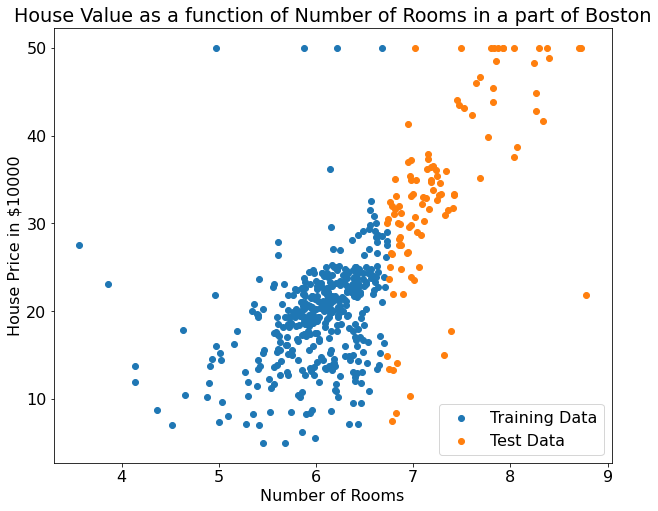

In [18]:
fig = plt.figure(figsize=(10, 8))
plt.rc('font',size = 16)
plt.scatter(X_train + X_mean, y_train + y_mean,label = 'Training Data')
plt.scatter(X_test + X_mean,y_test + y_mean,label = 'Test Data')
plt.title('House Value as a function of Number of Rooms in a part of Boston')
plt.xlabel('Number of Rooms')
plt.ylabel('House Price in $10000')
plt.legend()

## Analytically calculate the solution to the linear regression problem: w = (X'y)*(X'X)^{-1}

In [19]:
w = np.dot( np.dot(X_train.T,y_train),(np.linalg.inv(np.dot(X_train.T, X_train))))

## Import functions from sklearn to perform higher-order polynomial regression. Fit each of these higher-order models to our data.

In [20]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly2 = PolynomialFeatures(2)
poly3 = PolynomialFeatures(3)
poly10 = PolynomialFeatures(10)

reg2 = LinearRegression().fit(poly2.fit_transform(X_train),y_train)
reg3 = LinearRegression().fit(poly3.fit_transform(X_train),y_train)
reg10 = LinearRegression().fit(poly10.fit_transform(X_train),y_train)

## Plot each of these models with the data. We note that it appears that the quadratic fit generalizes the best to our test data. This is deceptive, however, since it is clear that at low room numbers, the quadratic fit would produce much too large median home values. This shows the need for using one or more validation data sets to ensure that we have chosen the correct hyperparameters for our model.

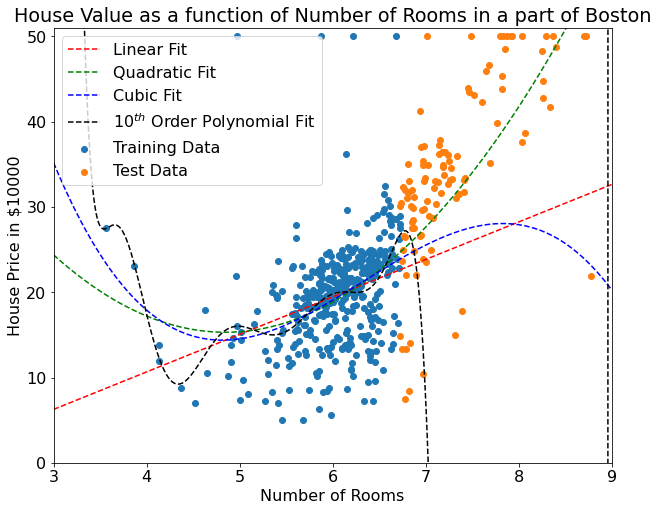

In [21]:
Xlin = np.linspace(3, 9, 506).reshape(-1,1)

y_pred = np.dot((Xlin-X_mean),w) + y_mean
y_pred2 = reg2.predict(poly2.fit_transform(Xlin-X_mean)) + y_mean
y_pred3 = reg3.predict(poly3.fit_transform(Xlin-X_mean)) + y_mean
y_pred10 = reg10.predict(poly10.fit_transform(Xlin-X_mean)) + y_mean

plt.figure(num=None, figsize=(10, 8))
plt.plot(Xlin, y_pred, 'r--',label = 'Linear Fit')
plt.plot(Xlin, y_pred2, 'g--',label = 'Quadratic Fit')
plt.plot(Xlin, y_pred3, 'b--',label = 'Cubic Fit')
plt.plot(Xlin, y_pred10, 'k--',label = '$10^{th}$ Order Polynomial Fit')
plt.scatter(X_train + X_mean, y_train + y_mean,label = 'Training Data')
plt.scatter(X_test + X_mean, y_test + y_mean, label = 'Test Data')
plt.title('House Value as a function of Number of Rooms in a part of Boston')
plt.xlabel('Number of Rooms')
plt.ylabel('House Price in $10000')
plt.xlim((3,9))
plt.ylim((0,51))
plt.legend()

## We calculate the error scores of each of our fits on the test data (R^2 = 1 is a perfect fit). Note that the score for quadratic fit is lowest, as expected from the plot above.

In [16]:
from sklearn.metrics import r2_score

score = r2_score(y_test, (X_test-X_mean)*w)
score2 = reg2.score(poly2.fit_transform(X_test-X_mean),y_test)
score3 = reg3.score(poly3.fit_transform(X_test-X_mean),y_test)
score10 = reg10.score(poly10.fit_transform(X_test-X_mean),y_test)
print('Linear fit score: %f' % score)
print('Quadratic fit score: %f' % score2)
print('Cubic fit score: %f' % score3)
print('10th Order fit score: %f' % score10)

Linear fit score: -29.960045
Quadratic fit score: -5.692622
Cubic fit score: -1.401486
10th Order fit score: -4658891888.105561


## Calculate the solution to the linear regression with a python library: statsmodels

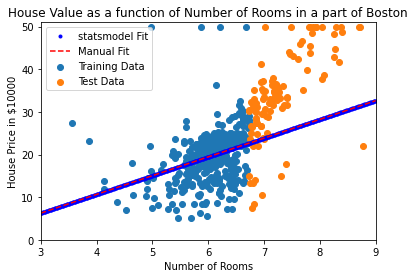

In [83]:
import statsmodels.api as sm


# Note the difference in argument order
model = sm.OLS(y_train, X_train).fit()
predictions = model.predict(Xlin-X_mean)+y_mean # make the predictions by the model
plt.plot(Xlin, predictions, 'b.',label = 'statsmodel Fit')
plt.plot(Xlin, np.dot(Xlin-X_mean,w)+y_mean, 'r--',label = 'Manual Fit')
plt.scatter(X_train + X_mean, y_train + y_mean,label = 'Training Data')
plt.scatter(X_test + X_mean, y_test + y_mean, label = 'Test Data')
plt.title('House Value as a function of Number of Rooms in a part of Boston')
plt.xlabel('Number of Rooms')
plt.ylabel('House Price in $10000')
plt.xlim((3,9))
plt.ylim((0,51))
plt.legend()

## Calculate the solution to the linear regression problem using stochastic gradient descent using a popular Machine learning package: Keras with Tensorflow

In [84]:
!git clone https://github.com/awikner/TREND.git

Cloning into 'TREND'...
remote: Enumerating objects: 61, done.
remote: Counting objects: 100% (61/61), done.
remote: Compressing objects: 100% (59/59), done.
remote: Total 61 (delta 28), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (61/61), done.


In [85]:
%run TREND/glasso.py

Using TensorFlow backend.


<Figure size 432x288 with 0 Axes>

In [88]:
[history, w_adam] = keras_regressor(X_train, y_train, num_epochs = 100, bsize = y.shape[0], learn_rate = 1e-1, N = 0, lam = 0.0)

Epoch 1/100
 - 0s - loss: 34.8303
Epoch 2/100
 - 0s - loss: 34.6928
Epoch 3/100
 - 0s - loss: 34.5783
Epoch 4/100
 - 0s - loss: 34.4491
Epoch 5/100
 - 0s - loss: 34.3245
Epoch 6/100
 - 0s - loss: 34.2045
Epoch 7/100
 - 0s - loss: 34.0927
Epoch 8/100
 - 0s - loss: 33.9843
Epoch 9/100
 - 0s - loss: 33.8797
Epoch 10/100
 - 0s - loss: 33.7793
Epoch 11/100
 - 0s - loss: 33.6832
Epoch 12/100
 - 0s - loss: 33.5915
Epoch 13/100
 - 0s - loss: 33.5044
Epoch 14/100
 - 0s - loss: 33.4218
Epoch 15/100
 - 0s - loss: 33.3438
Epoch 16/100
 - 0s - loss: 33.2704
Epoch 17/100
 - 0s - loss: 33.2020
Epoch 18/100
 - 0s - loss: 33.1376
Epoch 19/100
 - 0s - loss: 33.0776
Epoch 20/100
 - 0s - loss: 33.0219
Epoch 21/100
 - 0s - loss: 32.9705
Epoch 22/100
 - 0s - loss: 32.9232
Epoch 23/100
 - 0s - loss: 32.8798
Epoch 24/100
 - 0s - loss: 32.8403
Epoch 25/100
 - 0s - loss: 32.8044
Epoch 26/100
 - 0s - loss: 32.7720
Epoch 27/100
 - 0s - loss: 32.7429
Epoch 28/100
 - 0s - loss: 32.7170
Epoch 29/100
 - 0s - loss: 32

## See that the ML technique gives a very similar solution as the analytical solution

In [89]:
print(w_adam[0])
print(w[0])

[4.375348]
[4.39512602]


## Plot both models together with the data and see that they concur

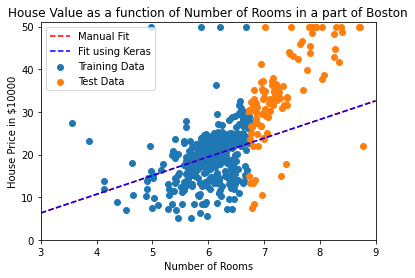

In [91]:
y_pred = (Xlin-X_mean)*w + y_mean
y_pred_adam = (Xlin-X_mean)*w_adam + y_mean
plt.plot(Xlin, y_pred, 'r--', label = 'Manual Fit')
plt.plot(Xlin, y_pred_adam, 'b--', label = 'Fit using Keras')
plt.scatter(X_train + X_mean, y_train + y_mean,label = 'Training Data')
plt.scatter(X_test + X_mean, y_test + y_mean, label = 'Test Data')
plt.title('House Value as a function of Number of Rooms in a part of Boston')
plt.xlabel('Number of Rooms')
plt.ylabel('House Price in $10000')
plt.xlim((3,9))
plt.ylim((0,51))
plt.legend()